<a href="https://colab.research.google.com/github/gagan-iitb/DSP505/blob/main/CNew_York_Taxi_fare_predictionsipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set()

In [ ]:
data = pd.read_csv('/content/NYCTaxiFares.csv')

Ananlyzing the data

In [ ]:
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [ ]:
data.tail()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
119995,2010-04-18 14:33:03 UTC,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1
119996,2010-04-23 10:27:48 UTC,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1
119997,2010-04-18 18:50:40 UTC,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3
119998,2010-04-13 08:14:44 UTC,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1
119999,2010-04-17 16:00:14 UTC,5.3,0,-73.955415,40.771920,-73.967623,40.763015,3


# How can we visualize not 5 but more data ?

EDA and Feature Engineering

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [ ]:
data.describe()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,10.040326,0.333333,-73.976626,40.751443,-73.974501,40.751695,1.347167
std,7.500134,0.471406,0.031497,0.025821,0.032419,0.030279,0.759263
min,2.500000,0.000000,-74.465447,40.121653,-74.443323,40.164927,1.000000
25%,5.700000,0.000000,-73.992386,40.736594,-73.991478,40.735914,1.000000
50%,7.700000,0.000000,-73.982084,40.753661,-73.980411,40.754441,1.000000
75%,11.300000,1.000000,-73.968710,40.768020,-73.965500,40.768880,1.000000
max,49.900000,1.000000,-73.311845,40.981292,-73.496140,40.993498,5.000000


In [ ]:
data.isnull().sum()

pickup_datetime      0
fare_amount          0
fare_class           0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

Converting date_time from **Object** type to **TimeStamp** type

In [ ]:
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"])

In [ ]:
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [ ]:
data.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

Describing all the data features

In [ ]:
data.describe()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,10.040326,0.333333,-73.976626,40.751443,-73.974501,40.751695,1.347167
std,7.500134,0.471406,0.031497,0.025821,0.032419,0.030279,0.759263
min,2.500000,0.000000,-74.465447,40.121653,-74.443323,40.164927,1.000000
25%,5.700000,0.000000,-73.992386,40.736594,-73.991478,40.735914,1.000000
50%,7.700000,0.000000,-73.982084,40.753661,-73.980411,40.754441,1.000000
75%,11.300000,1.000000,-73.968710,40.768020,-73.965500,40.768880,1.000000
max,49.900000,1.000000,-73.311845,40.981292,-73.496140,40.993498,5.000000


# Can you spot, at some places its written df.shape and at some places it is written df.info(). check for (), this makes a huge difference as without () it is a attribute and with () it becomes a method. Check for attributes and methods of pandas.

printing all the rows whose fare is more than 10$

In [ ]:
print("Fare amount greater than 10$ :", data[data["fare_amount"]>=10].shape[0])
data[data["fare_amount"] >=10]

Fare amount greater than 10$ : 40000


,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1
12,2010-04-23 12:12:08+00:00,17.3,1,-73.997107,40.722116,-73.976628,40.775252,1
16,2010-04-15 21:54:26+00:00,14.1,1,-74.002233,40.734468,-73.961872,40.764459,2
20,2010-04-20 11:27:29+00:00,36.0,1,-73.874537,40.774075,-73.985187,40.760783,1
...,...,...,...,...,...,...,...,...
119989,2010-04-17 19:19:19+00:00,11.7,1,-74.001573,40.727515,-73.967402,40.763441,1
119991,2010-04-12 16:43:37+00:00,11.3,1,-73.975583,40.760748,-73.984528,40.742072,1
119995,2010-04-18 14:33:03+00:00,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1
119996,2010-04-23 10:27:48+00:00,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1


The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes. Important in navigation, it is a special case of a more general formula in spherical trigonometry, the law of haversines, that relates the sides and angles of spherical triangles

In this notebook we can calculate distance between two points using Haversine Formula. First, convert the latitude and longitude values from decimal degrees to radians. For this divide the values of longitude and latitude of both the points by 180/pi. Use the value of r (radius) as 6371.

In [ ]:
from math import radians, cos,sin, asin,sqrt
def distance(lon1, lon2, lat1 , lat2):


    lon1 =radians(lon1)
    lon2 =radians(lon2)
    lat1 =radians(lat1)
    lat2 =radians(lat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))

    r = 6371
    return(round (c * r, 2))


d = []
for i in range(data.shape[0]):
    d.append(distance(data["pickup_latitude"][i],
                      data["dropoff_latitude"][i],
                      data["pickup_longitude"][i],
                      data["dropoff_longitude"][i]))

In [ ]:
data["distance in kms"] = d

Dropping the **latitude** and **longitude** features

In [ ]:
data.drop(["pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude"], axis=1, inplace=True)

In [ ]:
data.head()

,pickup_datetime,fare_amount,fare_class,passenger_count,distance in kms
0,2010-04-19 08:17:56+00:00,6.5,0,1,1.93
1,2010-04-17 15:43:53+00:00,6.9,0,1,1.77
2,2010-04-17 11:23:26+00:00,10.1,1,2,3.82
3,2010-04-11 21:25:03+00:00,8.9,0,1,2.16
4,2010-04-17 02:19:01+00:00,19.7,1,1,9.46


Extracting the unique date, month and year from the pickup time

In [ ]:
print("Date in data : ", data["pickup_datetime"].dt.day.sort_values().unique())
print("Month in data : ", data["pickup_datetime"].dt.month.unique()[0])
print("Year in data : ", data["pickup_datetime"].dt.year.unique()[0])

Date in data :  [11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]
Month in data :  4
Year in data :  2010


Mapping days and wekname

In [ ]:
week_names = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

data["weekday_name"] = data["pickup_datetime"].dt.weekday.map(week_names)

In [ ]:
data.head()

,pickup_datetime,fare_amount,fare_class,passenger_count,distance in kms,weekday_name
0,2010-04-19 08:17:56+00:00,6.5,0,1,1.93,Sunday
1,2010-04-17 15:43:53+00:00,6.9,0,1,1.77,Friday
2,2010-04-17 11:23:26+00:00,10.1,1,2,3.82,Friday
3,2010-04-11 21:25:03+00:00,8.9,0,1,2.16,Saturday
4,2010-04-17 02:19:01+00:00,19.7,1,1,9.46,Friday


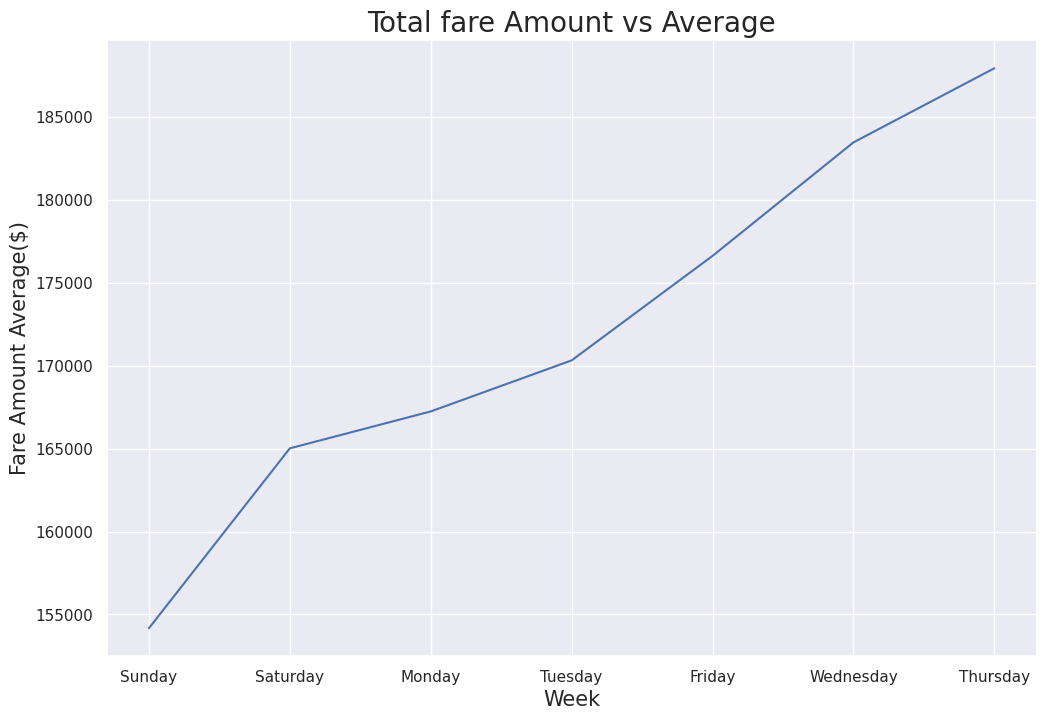

In [ ]:
plt.figure(figsize = (12,8))
data.groupby("weekday_name")["fare_amount"].sum().sort_values().plot()

plt.xlabel("Week", fontsize=15)
plt.ylabel("Fare Amount Average($)", fontsize=15)
plt.title("Total fare Amount vs Average", fontsize=20)
plt.show()

Encoding weekdays name to numbers

In [ ]:
week_names_encode = {"Sunday": 1, "Saturday": 2, "Monday": 3, "Tuesday": 4, "Friday": 5, "Wednesday": 6, "Thursday": 7}
data["weekday_name"] = data["weekday_name"].map(week_names_encode)

In [ ]:
data.head()

,pickup_datetime,fare_amount,fare_class,passenger_count,distance in kms,weekday_name
0,2010-04-19 08:17:56+00:00,6.5,0,1,1.93,1
1,2010-04-17 15:43:53+00:00,6.9,0,1,1.77,5
2,2010-04-17 11:23:26+00:00,10.1,1,2,3.82,5
3,2010-04-11 21:25:03+00:00,8.9,0,1,2.16,2
4,2010-04-17 02:19:01+00:00,19.7,1,1,9.46,5


In [ ]:
data["Hour"] = data["pickup_datetime"].dt.hour
data["Hour"].unique()

array([ 8, 15, 11, 21,  2, 19,  9, 18, 22, 17, 12, 10, 23,  1, 13, 16, 14,
        0, 20,  3,  7,  4,  6,  5], dtype=int32)

In [ ]:
data["Month_Day"] = data["pickup_datetime"].dt.day

Calculating the sum of taxi fare in particular day

In [ ]:

for day in list(data["pickup_datetime"].dt.day.sort_values().unique()):
    print(f"Date : {day} \t Total fare Amount : ${round(data[data.pickup_datetime.dt.day==day].fare_amount.sum(), 2)}")

Date : 11 	 Total fare Amount : $64911.95
Date : 12 	 Total fare Amount : $77483.5
Date : 13 	 Total fare Amount : $84961.02
Date : 14 	 Total fare Amount : $85054.18
Date : 15 	 Total fare Amount : $91743.83
Date : 16 	 Total fare Amount : $94096.09
Date : 17 	 Total fare Amount : $87853.61
Date : 18 	 Total fare Amount : $82439.11
Date : 19 	 Total fare Amount : $76683.18
Date : 20 	 Total fare Amount : $82287.96
Date : 21 	 Total fare Amount : $85274.48
Date : 22 	 Total fare Amount : $91738.54
Date : 23 	 Total fare Amount : $93860.29
Date : 24 	 Total fare Amount : $88780.99
Date : 25 	 Total fare Amount : $17670.4


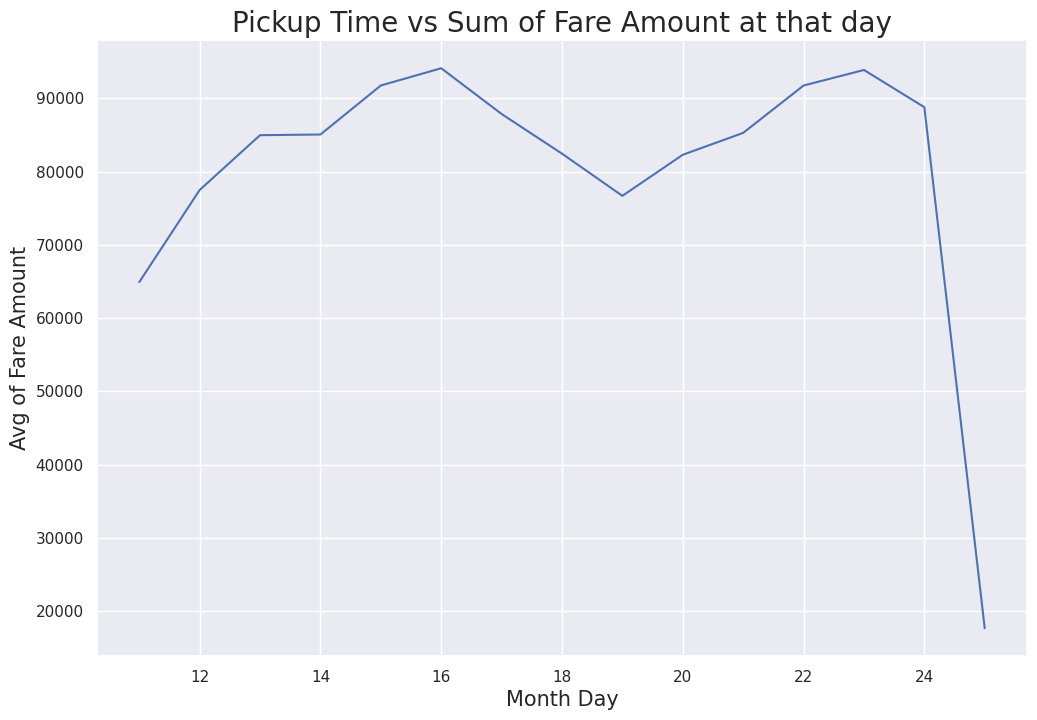

In [ ]:
plt.figure(figsize = (12, 8))

data.groupby("Month_Day")["fare_amount"].sum().plot()
plt.title("Pickup Time vs Sum of Fare Amount at that day", fontsize=20)
plt.xlabel("Month Day", fontsize=15)
plt.ylabel("Avg of Fare Amount", fontsize=15)
plt.show()

In [ ]:
data.head()

,pickup_datetime,fare_amount,fare_class,passenger_count,distance in kms,weekday_name,Hour,Month_Day
0,2010-04-19 08:17:56+00:00,6.5,0,1,1.93,1,8,19
1,2010-04-17 15:43:53+00:00,6.9,0,1,1.77,5,15,17
2,2010-04-17 11:23:26+00:00,10.1,1,2,3.82,5,11,17
3,2010-04-11 21:25:03+00:00,8.9,0,1,2.16,2,21,11
4,2010-04-17 02:19:01+00:00,19.7,1,1,9.46,5,2,17


Plotting the graph of **fare** vs **distance**

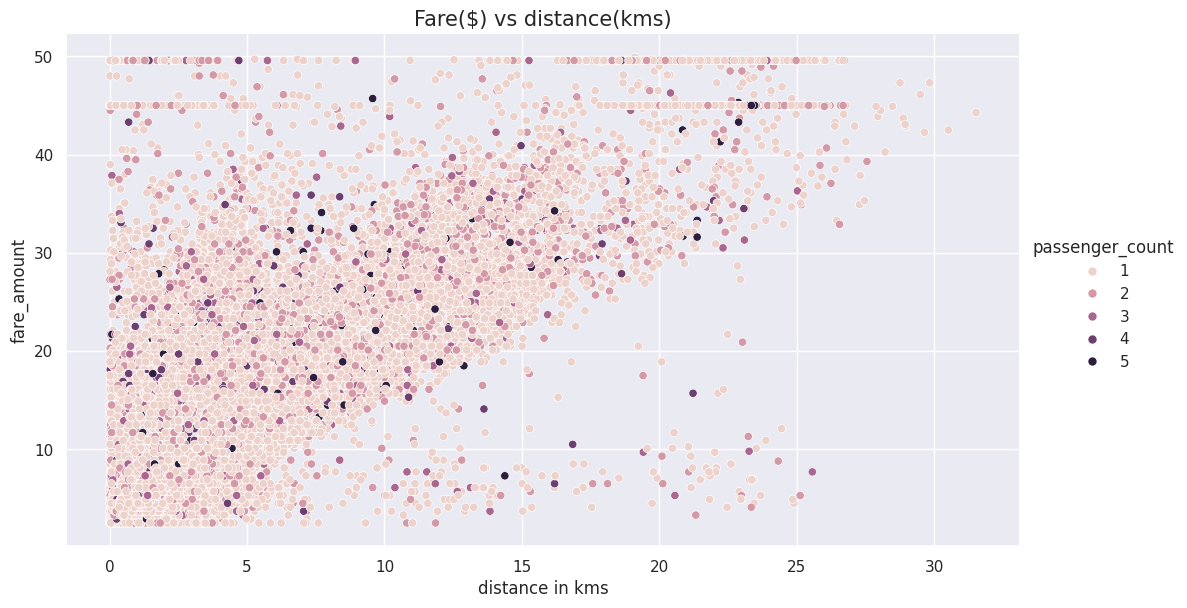

In [ ]:
sns.relplot(data = data, kind = "scatter",x = "distance in kms",y = "fare_amount",
            hue = "passenger_count",height=6 ,aspect = 1.75,)
plt.title("Fare($) vs distance(kms)" , fontsize=15)
plt.show()

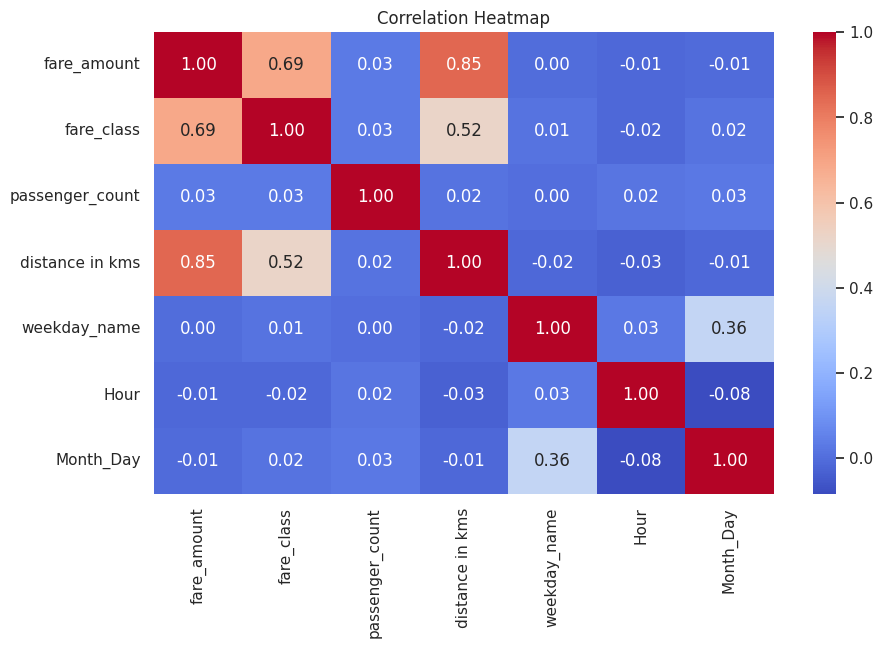

In [ ]:
features = ['fare_amount', 'fare_class', 'passenger_count', 'distance in kms', 'weekday_name', 'Hour', 'Month_Day']

# Calculate correlation matrix
correlation_matrix = data[features].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#What if feature to feature correlation is high/low and
#what if feature to target correlation is high/low?

In [ ]:
data["fare_class"].unique()

array([0, 1])

This is the total number of passengers travelling in taxi paying amountless than or more than 10$

In [ ]:
data.groupby(["fare_class","passenger_count"])[["passenger_count"]].sum()

passenger_count
fare_class passenger_count                 
0          1                          62591
           2                          23588
           3                           9426
           4                           6288
           5                           4505
1          1                          29940
           2                          13712
           3                           5196
           4                           3784
           5                           2630

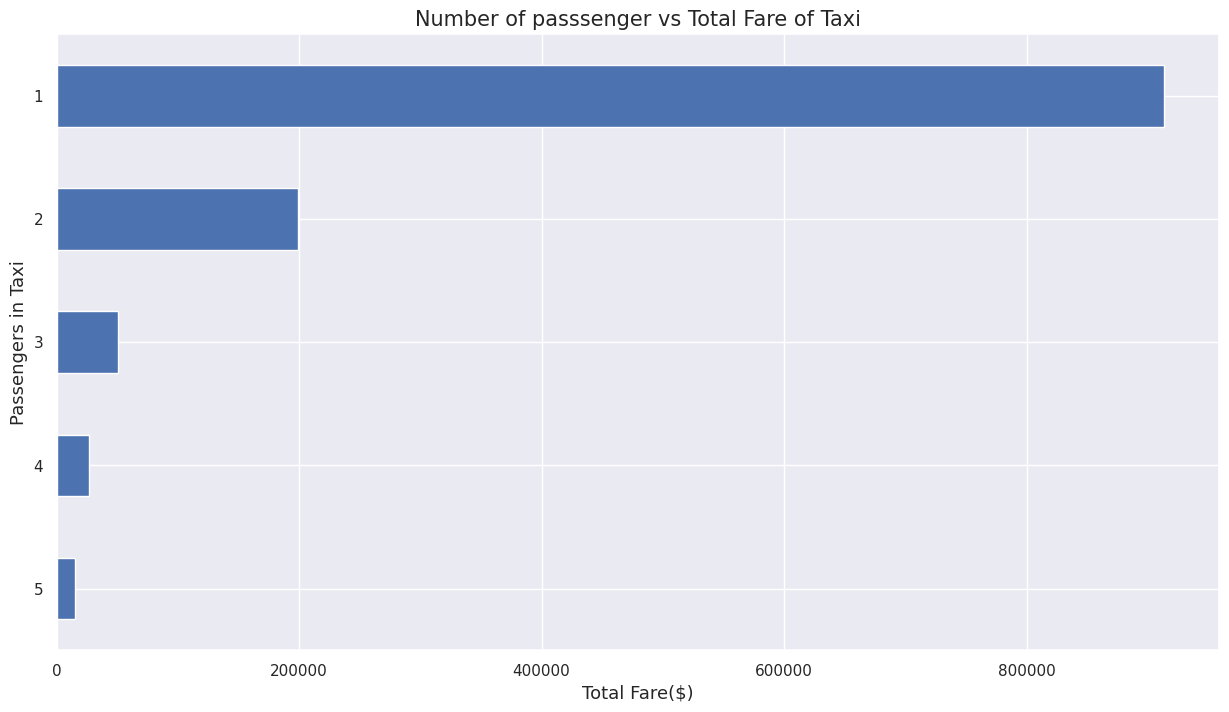

In [ ]:
plt.figure(figsize=(15,8))
data.groupby("passenger_count")["fare_amount"].sum().sort_values().plot.barh()
plt.xlabel("Total Fare($)",fontsize =13)
plt.ylabel("Passengers in Taxi", fontsize =13)
plt.title("Number of passsenger vs Total Fare of Taxi", fontsize = 15)
plt.show()

In [ ]:
data.drop("pickup_datetime", axis=1, inplace=True)

In [ ]:
data.head()

,fare_amount,fare_class,passenger_count,distance in kms,weekday_name,Hour,Month_Day
0,6.5,0,1,1.93,1,8,19
1,6.9,0,1,1.77,5,15,17
2,10.1,1,2,3.82,5,11,17
3,8.9,0,1,2.16,2,21,11
4,19.7,1,1,9.46,5,2,17


In [ ]:
X = data.iloc[: , 1:]
y = data.iloc[: , 0]

In [ ]:
X.head()

,fare_class,passenger_count,distance in kms,weekday_name,Hour,Month_Day
0,0,1,1.93,1,8,19
1,0,1,1.77,5,15,17
2,1,2,3.82,5,11,17
3,0,1,2.16,2,21,11
4,1,1,9.46,5,2,17


In [ ]:
y.head()

0     6.5
1     6.9
2    10.1
3     8.9
4    19.7
Name: fare_amount, dtype: float64

Doing the test train splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33)

# Can you think of other methods for train test split like K-Fold Cross Validation, Leave One out Cross Validation and others and what is its importance?

Applying Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the linear regression model
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train_scaled, y_train)


LinearRegression()

# Highlight the difference between standardization and normalization?

Genearting the predictions and calculating the **MSE** and **r2** score

In [ ]:
from sklearn.metrics import mean_squared_error

# Generate predictions
y_pred = linreg.predict(X_test_scaled)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error: ", mse)


Mean Squared Error:  10.779138994966921


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

0.8128806278559421

# What are the other evaluation metrics we can use ?

Applying the **Random Forest**

Random forest is an ensemble technique where n number of steps is taken from training data to predict the output

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators = 15)
rfreg.fit(X_train_scaled,y_train)

RandomForestRegressor(n_estimators=15)

In [ ]:
predict = rfreg.predict(X_test_scaled)

In [ ]:
mse_rf = mean_squared_error(y_test, predict)

In [ ]:
mse_rf

11.076954698245755

In [ ]:
r2_score(y_test, predict)

0.8077107263046033